In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./cluster_data.csv')
df.head()

,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,track_id
0,0.000000,0.0764,0.0240,0.549,0.320,0.616171,0.272637,0.341000,0.408,1,8,b129f3e0a0bdc1e61c57ce994f9d2932
1,0.018300,0.1090,0.0407,0.585,0.380,0.679864,0.562830,0.000357,0.759,1,9,64b30f6ac1acecb7cef9dc890e1c3ea7
2,0.000000,0.0931,0.0345,0.489,0.270,0.793428,0.347840,0.077000,0.846,1,4,cc1a46ee0446538ecf6b65db01c30cd8
3,0.000000,0.0909,0.0314,0.607,0.576,0.792416,0.526755,0.032700,0.934,1,3,dbbd8525c1bc48cc791bfe618b74bac6
4,0.000005,0.0951,0.1730,0.507,0.768,0.723356,0.388655,0.081800,0.923,1,0,dbdbb866939c1ab1dfd0d5cfac740eaa


In [2]:
df.describe()

,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key
count,354667.000000,354667.000000,354667.000000,354667.000000,354667.000000,354667.000000,354667.000000,354667.000000,354667.000000,354667.000000,354667.000000
mean,0.140143,0.187278,0.067717,0.559296,0.510321,0.614055,0.529018,0.142453,0.713213,0.646832,5.373607
std,0.271671,0.156197,0.064327,0.174263,0.247769,0.163124,0.163305,0.214459,0.184284,0.477955,3.610619
min,0.000000,0.013600,0.021800,0.064800,0.021100,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000
25%,0.000000,0.091000,0.034200,0.441000,0.314000,0.517898,0.403819,0.003360,0.586000,0.000000,2.000000
50%,0.000356,0.127000,0.045400,0.573000,0.505000,0.641132,0.523211,0.037600,0.739000,1.000000,6.000000
75%,0.089500,0.244000,0.071400,0.686000,0.713000,0.737684,0.624040,0.183000,0.866000,1.000000,9.000000
max,0.998000,0.993000,0.950000,0.982000,0.991000,1.000000,1.000000,0.995000,0.999000,1.000000,11.000000


In [3]:
df_drop_duplicates = df.drop_duplicates(subset='track_id')
df_drop_duplicates.describe()

,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key
count,26106.000000,26106.000000,26106.000000,26106.000000,26106.000000,26106.000000,26106.000000,26106.000000,26106.000000,26106.000000,26106.000000
mean,0.140333,0.199164,0.077476,0.557095,0.518590,0.615919,0.527128,0.171059,0.709405,0.628208,5.339692
std,0.274931,0.165886,0.082040,0.174010,0.247493,0.165981,0.167590,0.239328,0.196046,0.483292,3.579922
min,0.000000,0.013600,0.021800,0.064800,0.021100,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000
25%,0.000002,0.092800,0.034500,0.437000,0.320000,0.514759,0.393123,0.003592,0.567000,0.000000,2.000000
50%,0.000482,0.132000,0.046400,0.566000,0.519000,0.645334,0.518444,0.050150,0.739000,1.000000,5.000000
75%,0.082275,0.268000,0.077900,0.686000,0.719000,0.741380,0.632990,0.249000,0.875000,1.000000,9.000000
max,0.998000,0.993000,0.950000,0.982000,0.991000,1.000000,1.000000,0.995000,0.999000,1.000000,11.000000


从上面数据似乎看出了些问题，loudness、tempo为0的数据不正常，因为他们表征音乐的响度为0/速度为0，看看有多少个？

In [4]:
df_drop_duplicates

,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,track_id
0,0.000000,0.0764,0.0240,0.549,0.320,0.616171,0.272637,0.341000,0.408,1,8,b129f3e0a0bdc1e61c57ce994f9d2932
1,0.018300,0.1090,0.0407,0.585,0.380,0.679864,0.562830,0.000357,0.759,1,9,64b30f6ac1acecb7cef9dc890e1c3ea7
2,0.000000,0.0931,0.0345,0.489,0.270,0.793428,0.347840,0.077000,0.846,1,4,cc1a46ee0446538ecf6b65db01c30cd8
3,0.000000,0.0909,0.0314,0.607,0.576,0.792416,0.526755,0.032700,0.934,1,3,dbbd8525c1bc48cc791bfe618b74bac6
4,0.000005,0.0951,0.1730,0.507,0.768,0.723356,0.388655,0.081800,0.923,1,0,dbdbb866939c1ab1dfd0d5cfac740eaa
...,...,...,...,...,...,...,...,...,...,...,...,...
354651,0.000004,0.1330,0.0334,0.374,0.345,0.566705,0.519358,0.870000,0.301,1,8,1964fe88117e70600db8361911403258
354652,0.257000,0.0944,0.0375,0.283,0.270,0.528226,0.705930,0.000002,0.678,1,8,bd3e4aae3b45cfd54e29bd6f23793f89
354661,0.834000,0.0732,0.0544,0.780,0.519,0.702547,0.557041,0.000417,0.790,0,11,0c52e17af8daeeaff4191dcbd99244da
354665,0.091000,0.2830,0.0403,0.538,0.884,0.498051,0.333089,0.674000,0.836,1,0,2fd9f021f0a9336ef8c2585740491d21


### DBSCAN聚类

In [5]:
# 直接聚类试试
'''
DBSCAN聚类
'''
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np

X = MinMaxScaler().fit_transform(df_drop_duplicates.drop(['track_id'], axis = 1))

Unique values: [-1  0  1  2  3  4]
Counts: [ 5845 13367  6825    43    15    11]
Estimated number of clusters: 5
Estimated number of noise points: 5845


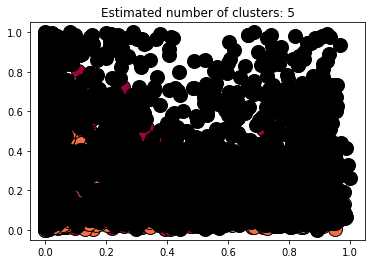

In [6]:
# eps越小，密度要求越紧密，聚成的数目越多，识别为噪声的数据越少；min_sample越小，聚成的类别越少
# 0.28 12
# 0.29 16
db = DBSCAN(eps=0.29, min_samples=16).fit(X)
labels = db.labels_

unique, counts = np.unique(labels, return_counts=True)
print("Unique values:", unique)
print("Counts:", counts)


# 离群点标记为-1
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # 离群点用黑色表示
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [7]:
print(X)

[[0.         0.06412089 0.00237018 ... 0.26032541 1.         0.72727273]
 [0.01833667 0.09740658 0.02036199 ... 0.69962453 1.         0.81818182]
 [0.         0.08117215 0.0136824  ... 0.80851064 1.         0.36363636]
 ...
 [0.83567134 0.06085358 0.03512174 ... 0.73842303 0.         1.        ]
 [0.09118236 0.27506637 0.01993105 ... 0.79599499 1.         0.        ]
 [0.32064128 0.38840106 0.03555268 ... 0.70838548 0.         0.81818182]]


In [8]:
df_drop_duplicates[ 'labels'] = labels
df_drop_duplicates

,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,track_id,labels
0,0.000000,0.0764,0.0240,0.549,0.320,0.616171,0.272637,0.341000,0.408,1,8,b129f3e0a0bdc1e61c57ce994f9d2932,0
1,0.018300,0.1090,0.0407,0.585,0.380,0.679864,0.562830,0.000357,0.759,1,9,64b30f6ac1acecb7cef9dc890e1c3ea7,0
2,0.000000,0.0931,0.0345,0.489,0.270,0.793428,0.347840,0.077000,0.846,1,4,cc1a46ee0446538ecf6b65db01c30cd8,0
3,0.000000,0.0909,0.0314,0.607,0.576,0.792416,0.526755,0.032700,0.934,1,3,dbbd8525c1bc48cc791bfe618b74bac6,0
4,0.000005,0.0951,0.1730,0.507,0.768,0.723356,0.388655,0.081800,0.923,1,0,dbdbb866939c1ab1dfd0d5cfac740eaa,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354651,0.000004,0.1330,0.0334,0.374,0.345,0.566705,0.519358,0.870000,0.301,1,8,1964fe88117e70600db8361911403258,0
354652,0.257000,0.0944,0.0375,0.283,0.270,0.528226,0.705930,0.000002,0.678,1,8,bd3e4aae3b45cfd54e29bd6f23793f89,0
354661,0.834000,0.0732,0.0544,0.780,0.519,0.702547,0.557041,0.000417,0.790,0,11,0c52e17af8daeeaff4191dcbd99244da,1
354665,0.091000,0.2830,0.0403,0.538,0.884,0.498051,0.333089,0.674000,0.836,1,0,2fd9f021f0a9336ef8c2585740491d21,-1


In [9]:
# 用此数据做分类
print(df_drop_duplicates.labels.value_counts())
df_drop_duplicates[['track_id', 'labels']].to_csv('./track_to_labels.csv', index=False)

labels
 0    13367
 1     6825
-1     5845
 2       43
 3       15
 4       11
Name: count, dtype: int64


### k-means聚类

In [10]:
X.shape

(26106, 11)

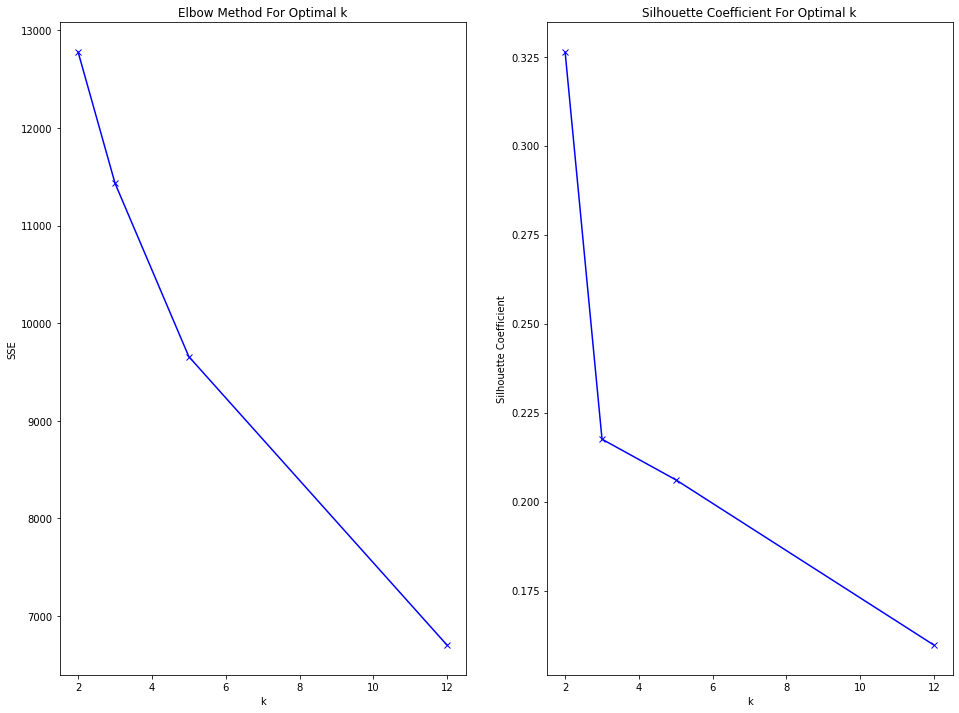

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

'''
kmeans聚类
'''
sse = []
silhouette_coefficients = []
sample_size = 20000

# 尝试不同的K值
k_range = [2, 3, 5, 12]
for k in k_range:  # K值从2开始
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    y_kmeans = kmeans.predict(X)
    
    # 如果样本量比这个数字大，就进行采样
    if X.shape[0] > sample_size:
        X_sample, y_kmeans_sample = resample(X, y_kmeans, n_samples=sample_size, random_state=42, stratify=y_kmeans)
    else:
        X_sample, y_kmeans_sample = X, y_kmeans
        
    # 轮廓系数
    score = silhouette_score(X_sample, y_kmeans_sample)
    silhouette_coefficients.append(score)

# 绘制肘部图
plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')

# 绘制轮廓系数图
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_coefficients, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient For Optimal k')

plt.show()

**手肘法：** 随着聚类数k 的增加，样本划分会更精细，每个簇的聚合度会提高，导致总体的聚类成本（如总内平方和，SSE）下降。手肘法通过寻找这个成本下降的“手肘”点来确定最优的k 值，这个点是成本下降速率骤降的地方。

**轮廓系数：** 

1、对每个样本，计算它与同簇其他样本的平均距离a（凝聚度）。

2、对每个样本，计算它与最近簇中所有样本的平均距离b（分离度）。

3、对每个样本，计算轮廓系数：s = (b - a) / max(a,b)

4、计算所有样本的轮廓系数平均值作为整个聚类的评估指标。

5、对于不同的k 值，选择轮廓系数平均值最高的k 作为最优聚类数。

**结论：** 根据手肘法变化趋势，k取3或5是个不错的选择，根据轮廓系数可能得选2，3（因为4过后的轮廓系数已经降得很低了），根据知识领域的需要，可以选择2，3（表征音乐的Positive, (Neutral), Negtive）进行聚类。 

**Problem:**是否可以做到将聚成的5类和想要的5类吻合呢？

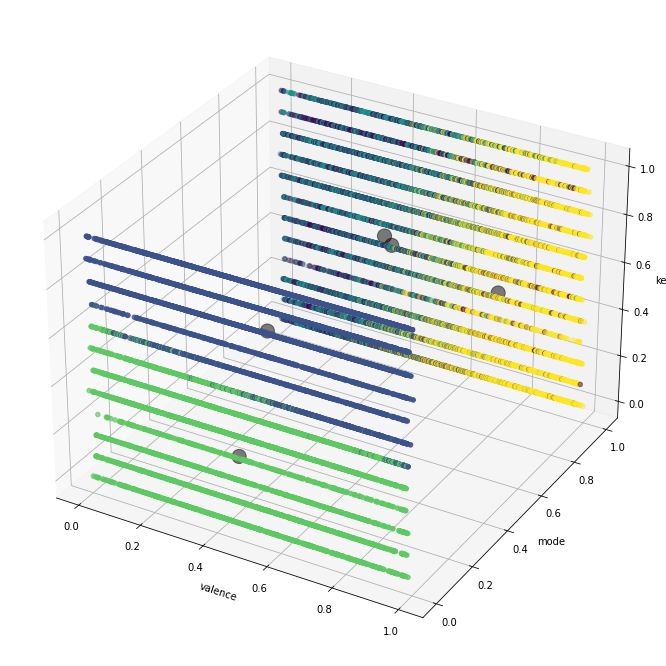

In [12]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# 可视化3D聚类结果
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 4], X[:, 9], X[:, 10], c=y_kmeans, cmap='viridis')

# 绘制聚类中心
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 4], centers[:, 9], centers[:, 10], c='black', s=200, alpha=0.5)

ax.set_xlabel('valence')
ax.set_ylabel('mode')
ax.set_zlabel('key')
plt.show()

In [13]:
df_drop_duplicates['labels'] = y_kmeans
df_drop_duplicates

,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,track_id,labels
0,0.000000,0.0764,0.0240,0.549,0.320,0.616171,0.272637,0.341000,0.408,1,8,b129f3e0a0bdc1e61c57ce994f9d2932,0
1,0.018300,0.1090,0.0407,0.585,0.380,0.679864,0.562830,0.000357,0.759,1,9,64b30f6ac1acecb7cef9dc890e1c3ea7,2
2,0.000000,0.0931,0.0345,0.489,0.270,0.793428,0.347840,0.077000,0.846,1,4,cc1a46ee0446538ecf6b65db01c30cd8,2
3,0.000000,0.0909,0.0314,0.607,0.576,0.792416,0.526755,0.032700,0.934,1,3,dbbd8525c1bc48cc791bfe618b74bac6,4
4,0.000005,0.0951,0.1730,0.507,0.768,0.723356,0.388655,0.081800,0.923,1,0,dbdbb866939c1ab1dfd0d5cfac740eaa,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354651,0.000004,0.1330,0.0334,0.374,0.345,0.566705,0.519358,0.870000,0.301,1,8,1964fe88117e70600db8361911403258,0
354652,0.257000,0.0944,0.0375,0.283,0.270,0.528226,0.705930,0.000002,0.678,1,8,bd3e4aae3b45cfd54e29bd6f23793f89,2
354661,0.834000,0.0732,0.0544,0.780,0.519,0.702547,0.557041,0.000417,0.790,0,11,0c52e17af8daeeaff4191dcbd99244da,1
354665,0.091000,0.2830,0.0403,0.538,0.884,0.498051,0.333089,0.674000,0.836,1,0,2fd9f021f0a9336ef8c2585740491d21,4


In [14]:
# 用此数据做分类
print(df_drop_duplicates.labels.value_counts())
df_drop_duplicates[['track_id', 'labels']].to_csv('./track_to_labels.csv', index=False)

labels
4    6798
2    6107
1    4876
3    4830
0    3495
Name: count, dtype: int64
